This notebook is intended to take the output from the h2p server and combine and analyze it.

The cobining I imagine will be pretty straight forward.

The analyzing...

- I think it might be interesting to look at the average ROC behavior for each model, for example, the average ROC for each model.  
- Did Smoting help?  
- Does the transformed data look better?  
- Are the runs with defined by the medium of targets look better?

I also think that it could be interesting to look at the runs that resulted in the top 1% of metrics. 

How do I take into account the recall and precision together? 

# Combining
https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/

In [2]:
import os
import glob
import pandas as pd
import seaborn as sns # Also to visualize
import matplotlib.pyplot as plt  # To visualize

In [3]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [4]:
if "Trans_BestMdls.csv" in all_filenames:
    all_filenames.remove("Trans_BestMdls.csv")

if "Trans_combined_csv.csv" in all_filenames:
    all_filenames.remove("Trans_combined_csv.csv")

In [5]:
#combine all files in the list
Trans_combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
Trans_combined_csv.to_csv( "Trans_combined_csv.csv", index=False, encoding='utf-8-sig')

In [6]:
Trans_combined_csv.shape

(7247500, 18)

# Analyzing All Models


In [7]:
import pandas as pd
Trans_combined_csv = pd.read_csv("Trans_combined_csv.csv")

In [8]:
Trans_combined_csv.head()

,Baseline,Classifier,Features,Parameters,Precision_10%,Precision_20%,Precision_30%,Precision_40%,Precision_5%,Precision_50%,ROC,Recall_10%,Recall_20%,Recall_30%,Recall_40%,Recall_5%,Recall_50%,Split Type
0,0.0,['LR'],"['C(Stroke)[T.1.0]', 'C(SpeedRatio)[T.3.0]']","LogisticRegression(C=1e-05, max_iter=10000, so...",0.75,0.777778,0.846154,0.888889,1.0,0.869565,0.5,0.071429,0.166667,0.261905,0.380952,0.047619,0.47619,KFold
1,0.0,['LR'],"['C(Stroke)[T.1.0]', 'C(SpeedRatio)[T.3.0]']","LogisticRegression(C=0.0001, max_iter=10000, s...",0.75,0.777778,0.846154,0.888889,1.0,0.869565,0.5,0.071429,0.166667,0.261905,0.380952,0.047619,0.47619,KFold
2,0.0,['LR'],"['C(Stroke)[T.1.0]', 'C(SpeedRatio)[T.3.0]']","LogisticRegression(C=0.001, max_iter=10000, so...",0.75,0.777778,0.846154,0.888889,1.0,0.869565,0.5,0.071429,0.166667,0.261905,0.380952,0.047619,0.47619,KFold
3,0.0,['LR'],"['C(Stroke)[T.1.0]', 'C(SpeedRatio)[T.3.0]']","LogisticRegression(C=0.01, max_iter=10000, sol...",0.75,0.777778,0.846154,0.888889,1.0,0.869565,0.5,0.071429,0.166667,0.261905,0.380952,0.047619,0.47619,KFold
4,0.0,['LR'],"['C(Stroke)[T.1.0]', 'C(SpeedRatio)[T.3.0]']","LogisticRegression(C=0.1, max_iter=10000, solv...",0.75,0.777778,0.846154,0.888889,1.0,0.869565,0.5,0.071429,0.166667,0.261905,0.380952,0.047619,0.47619,KFold


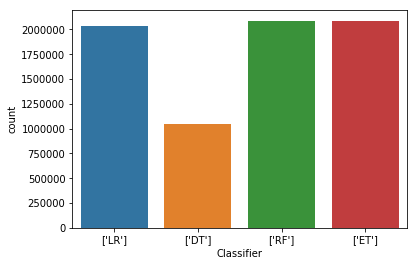

In [9]:
sns.countplot(x="Classifier", data=Trans_combined_csv)
plt.show()

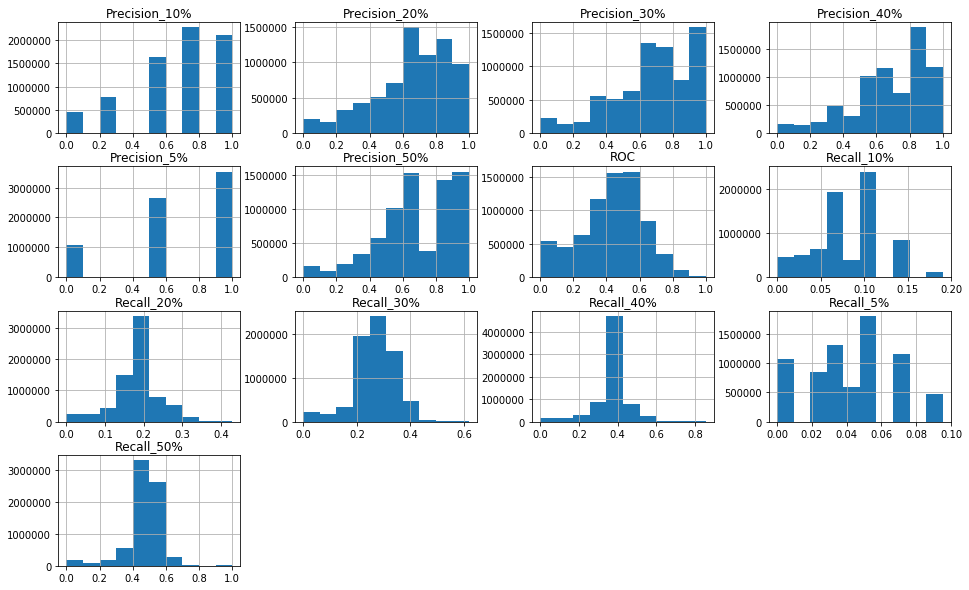

In [10]:
Trans_combined_csv[['ROC', 'Recall_5%', 'Recall_10%', 'Recall_20%', 'Recall_30%', 'Recall_40%', 'Recall_50%',\
              'Precision_5%', 'Precision_10%', 'Precision_20%', 'Precision_30%', 'Precision_40%', 'Precision_50%']].hist(figsize = (16, 10));
plt.show()

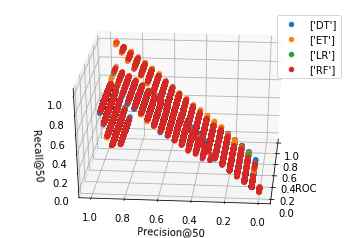

In [12]:
groups = Trans_combined_csv.groupby("Classifier")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for name, group in groups:
    #plt.plot(group["ROC"], group["Precision_50%"], marker="o", linestyle="", label=name)
    ax.scatter(group["ROC"], group["Precision_50%"], group["Recall_50%"], marker="o", label=name)

ax.view_init(30, 185)
ax.set_xlabel('ROC')
ax.set_ylabel('Precision@50')
ax.set_zlabel('Recall@50')
plt.legend()
plt.show()
    

# Defining the Best Models

In [18]:
IndexNotOfInterest = (Trans_combined_csv["ROC"]<.95)  | \
    (Trans_combined_csv["Precision_50%"]<.95) | (Trans_combined_csv["Recall_50%"]<.95)

Trans_BestMdls = Trans_combined_csv.drop(Trans_combined_csv[IndexNotOfInterest].index)
Trans_BestMdls.shape

(160, 18)

In [19]:
Trans_BestMdls.to_csv( "Trans_BestMdls.csv", index=False, encoding='utf-8-sig')

# Analyzing Only the Best Models

In [20]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Also to visualize

Trans_BestMdls = pd.read_csv("Trans_BestMdls.csv")
Trans_BestMdls.head()

,Baseline,Classifier,Features,Parameters,Precision_10%,Precision_20%,Precision_30%,Precision_40%,Precision_5%,Precision_50%,ROC,Recall_10%,Recall_20%,Recall_30%,Recall_40%,Recall_5%,Recall_50%,Split Type
0,0.0,['DT'],"['C(SpeedRatio)[T.3.0]', 'SpeedDifference', 'C...","DecisionTreeClassifier(max_depth=5, max_featur...",1.0,1.000000,1.000000,0.944444,1.0,0.954545,0.970238,0.190476,0.428571,0.619048,0.809524,0.095238,1.0,KFold
1,0.0,['DT'],"['C(SpeedRatio)[T.3.0]', 'MidSpeed', 'BMI', 'C...","DecisionTreeClassifier(max_depth=10, max_featu...",1.0,0.888889,0.923077,0.944444,1.0,0.954545,0.968254,0.190476,0.380952,0.571429,0.809524,0.095238,1.0,KFold_SMOTE
2,0.0,['DT'],"['C(SpeedRatio)[T.3.0]', 'Height', 'BMI', 'C(I...","DecisionTreeClassifier(max_depth=5, max_featur...",1.0,1.000000,1.000000,0.944444,1.0,0.954545,0.988095,0.190476,0.428571,0.619048,0.809524,0.095238,1.0,KFold_SMOTE
3,0.0,['RF'],"['C(Stroke)[T.1.0]', 'C(SpeedRatio)[T.3.0]', '...","RandomForestClassifier(max_depth=5, max_featur...",1.0,1.000000,1.000000,1.000000,1.0,0.954545,0.991071,0.190476,0.428571,0.619048,0.857143,0.095238,1.0,KFold
4,0.0,['ET'],"['C(Stroke)[T.1.0]', 'C(SpeedRatio)[T.3.0]', '...","ExtraTreesClassifier(max_depth=5, max_features...",1.0,1.000000,0.923077,0.944444,1.0,0.954545,0.981151,0.190476,0.428571,0.571429,0.809524,0.095238,1.0,KFold


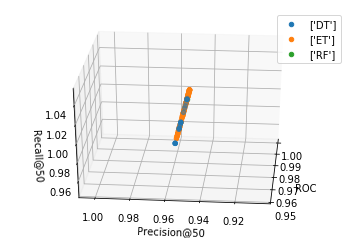

In [21]:
groups = Trans_BestMdls.groupby("Classifier")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for name, group in groups:
    #plt.plot(group["ROC"], group["Precision_50%"], marker="o", linestyle="", label=name)
    ax.scatter(group["ROC"], group["Precision_50%"], group["Recall_50%"], marker="o", label=name)

ax.view_init(30, 185)
ax.set_xlabel('ROC')
ax.set_ylabel('Precision@50')
ax.set_zlabel('Recall@50')
plt.legend()
plt.show()

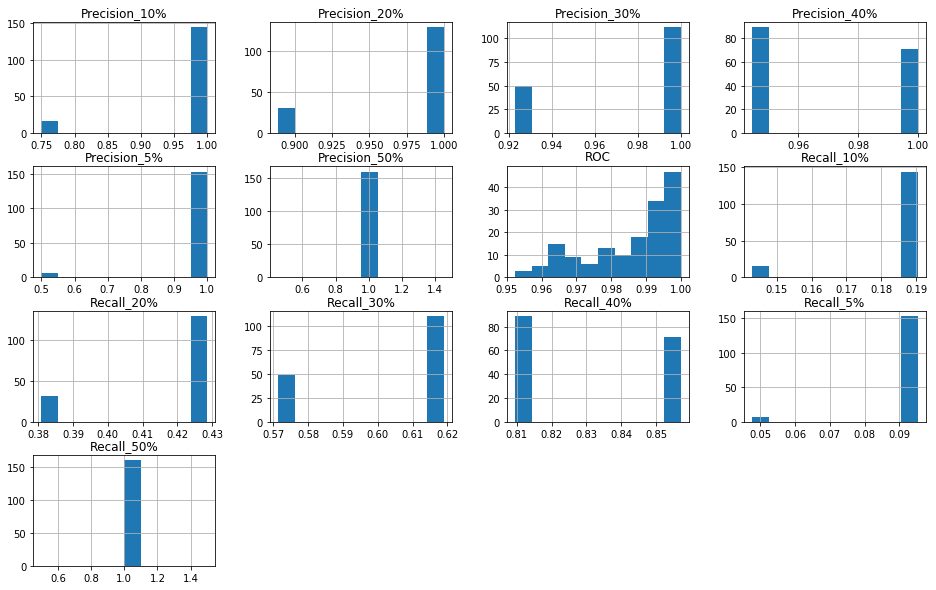

In [22]:
Trans_BestMdls[['ROC', 'Recall_5%', 'Recall_10%', 'Recall_20%', 'Recall_30%', 'Recall_40%', 'Recall_50%',\
              'Precision_5%', 'Precision_10%', 'Precision_20%', 'Precision_30%', 'Precision_40%', \
          'Precision_50%']].hist(figsize = (16, 10));
plt.show()

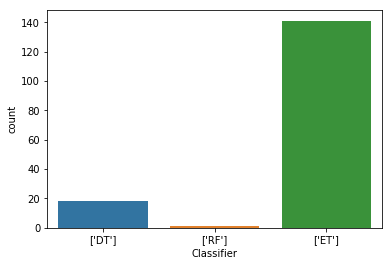

In [23]:
sns.countplot(x="Classifier", data=Trans_BestMdls)
plt.show()

In [24]:
DT_index = Trans_BestMdls[Trans_BestMdls['Classifier'] == "['DT']"].index.values
ET_index = Trans_BestMdls[Trans_BestMdls['Classifier'] == "['ET']"].index.values
RF_index = Trans_BestMdls[Trans_BestMdls['Classifier'] == "['RF']"].index.values

<function matplotlib.pyplot.show(*args, **kw)>

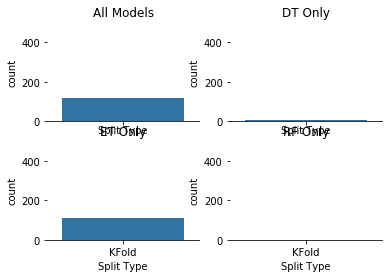

In [25]:
# Set up the matplotlib figure to show how SMOTING the data is beneficial for each model
f, axes = plt.subplots(2, 2, sharex=True)
sns.despine(left=True)

sns.countplot(x="Split Type", data=Trans_BestMdls, ax=axes[0, 0])
axes[0, 0].set_title("All Models")
axes[0, 0].set_ylim(0, 500)

sns.countplot(x="Split Type", data=Trans_BestMdls.iloc[DT_index], ax=axes[0, 1])
axes[0, 1].set_title("DT Only")
axes[0, 1].set_ylim(0, 500)

sns.countplot(x="Split Type", data=Trans_BestMdls.iloc[ET_index], ax=axes[1, 0])
axes[1, 0].set_title("ET Only")
axes[1, 0].set_ylim(0, 500)

sns.countplot(x="Split Type", data=Trans_BestMdls.iloc[RF_index], ax=axes[1, 1])
axes[1, 1].set_title("RF Only")
axes[1, 1].set_ylim(0, 500)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

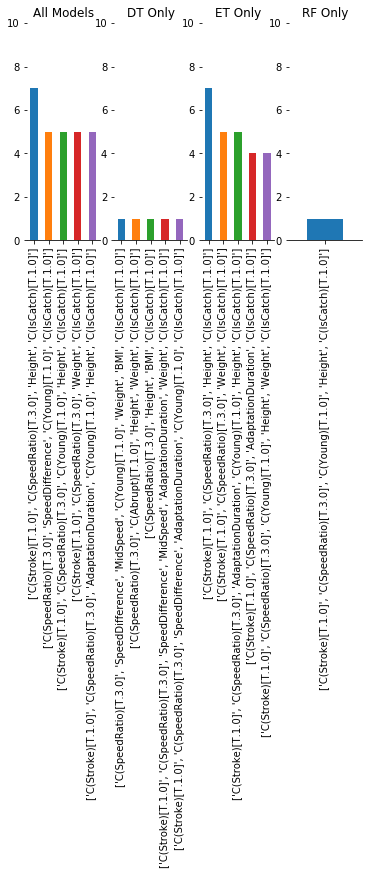

In [27]:
# Set up the matplotlib figure to show how the features vary across models
f, axes = plt.subplots(1, 4, sharex=False)
sns.despine(left=True)

f1 = pd.Series(Trans_BestMdls["Features"])
f1.value_counts()[:5].plot(kind="bar", ax=axes[0])
axes[0].set_title("All Models")
axes[0].set_ylim(0, 10)

f2 = pd.Series(Trans_BestMdls["Features"].iloc[DT_index])
f2.value_counts()[:5].plot(kind="bar", ax=axes[1])
axes[1].set_title("DT Only")
axes[1].set_ylim(0, 10)

f3 = pd.Series(Trans_BestMdls["Features"].iloc[ET_index])
f3.value_counts()[:5].plot(kind="bar", ax=axes[2])
axes[2].set_title("ET Only")
axes[2].set_ylim(0, 10)

f4 = pd.Series(Trans_BestMdls["Features"].iloc[RF_index])
f4.value_counts()[:5].plot(kind="bar", ax=axes[3])
axes[3].set_title("RF Only")
axes[3].set_ylim(0, 10)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

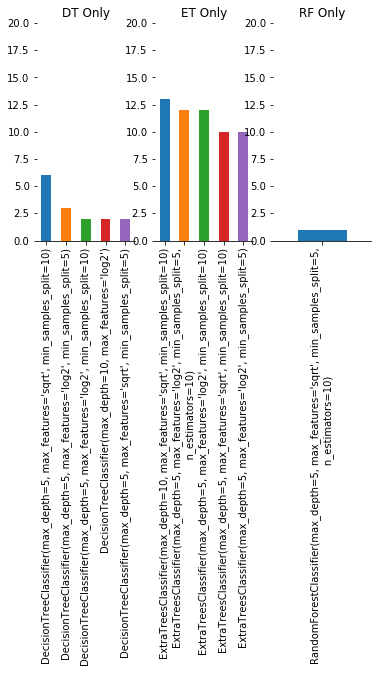

In [29]:
# Set up the matplotlib figure to show how the paremeter vary across models
f, axes = plt.subplots(1, 3, sharex=False)
sns.despine(left=True)

f2 = pd.Series(Trans_BestMdls["Parameters"].iloc[DT_index])
f2.value_counts()[:5].plot(kind="bar", ax=axes[0])
axes[0].set_title("DT Only")
axes[0].set_ylim(0, 20)

f3 = pd.Series(Trans_BestMdls["Parameters"].iloc[ET_index])
f3.value_counts()[:5].plot(kind="bar", ax=axes[1])
axes[1].set_title("ET Only")
axes[1].set_ylim(0, 20)

f4 = pd.Series(Trans_BestMdls["Parameters"].iloc[RF_index])
f4.value_counts()[:5].plot(kind="bar", ax=axes[2])
axes[2].set_title("RF Only")
axes[2].set_ylim(0, 20)

plt.show